## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Fri Jul 14 06:36:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 66.2MB/s]
2023-07-14 06:36:57.501583: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 06:36:58.428421: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 98.6MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 228.7ms
Speed: 0.8ms pre-process, 228.7ms inference, 513.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


/content


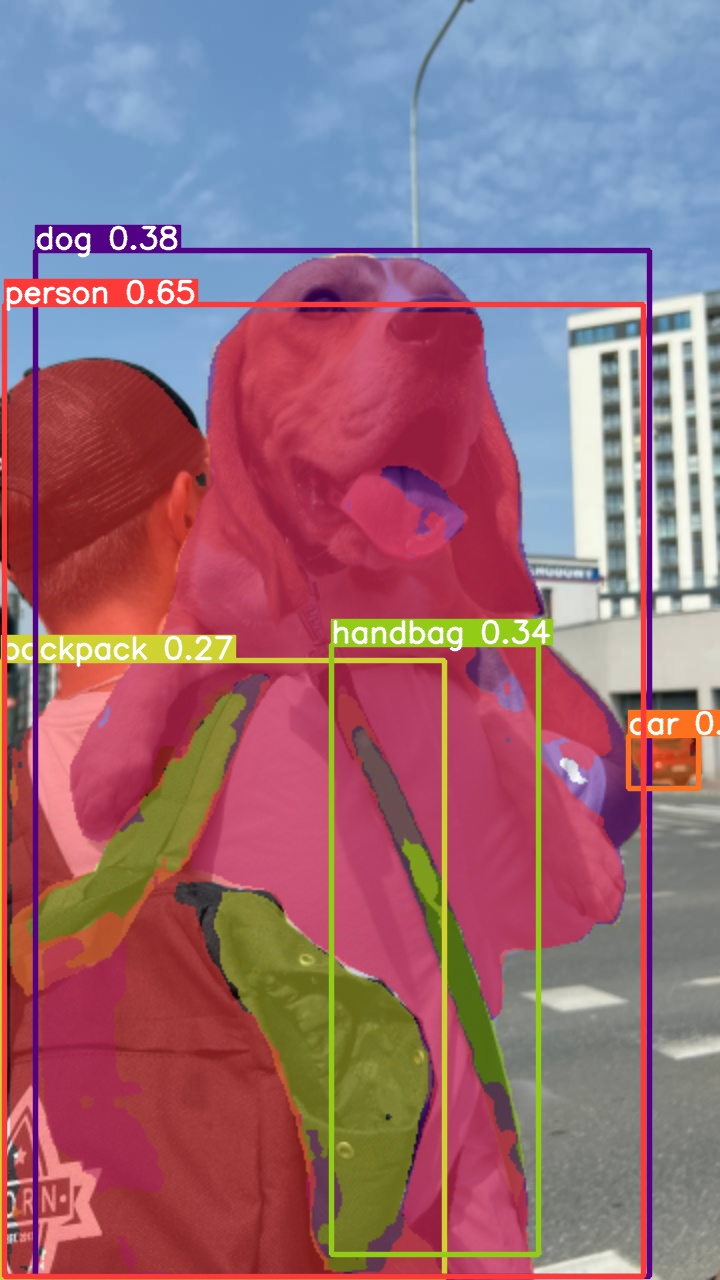

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ROOT_PATH = "/content/drive/MyDrive/fullbody_seg"

In [ ]:
!pwd

/content


In [ ]:
%cd "/content/drive/MyDrive/fullbody_seg"

/content/drive/MyDrive/fullbody_seg


In [ ]:
!pwd

/content/drive/MyDrive/fullbody_seg


In [ ]:
!ls

data.yaml  test       test_full_body.jpg  valid
runs	   test2.png  train		  yolov8s-seg.pt


## Custom Training

In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

In [ ]:
!ls runs/segment/train/

args.yaml					    MaskPR_curve.png
BoxF1_curve.png					    MaskR_curve.png
BoxP_curve.png					    results.csv
BoxPR_curve.png					    results.png
BoxR_curve.png					    val_batch0_pred.jpg
confusion_matrix.png				    val_batch1_pred.jpg
events.out.tfevents.1689316986.1cbf2f2a0448.2632.0  val_batch2_pred.jpg
MaskF1_curve.png				    weights
MaskP_curve.png


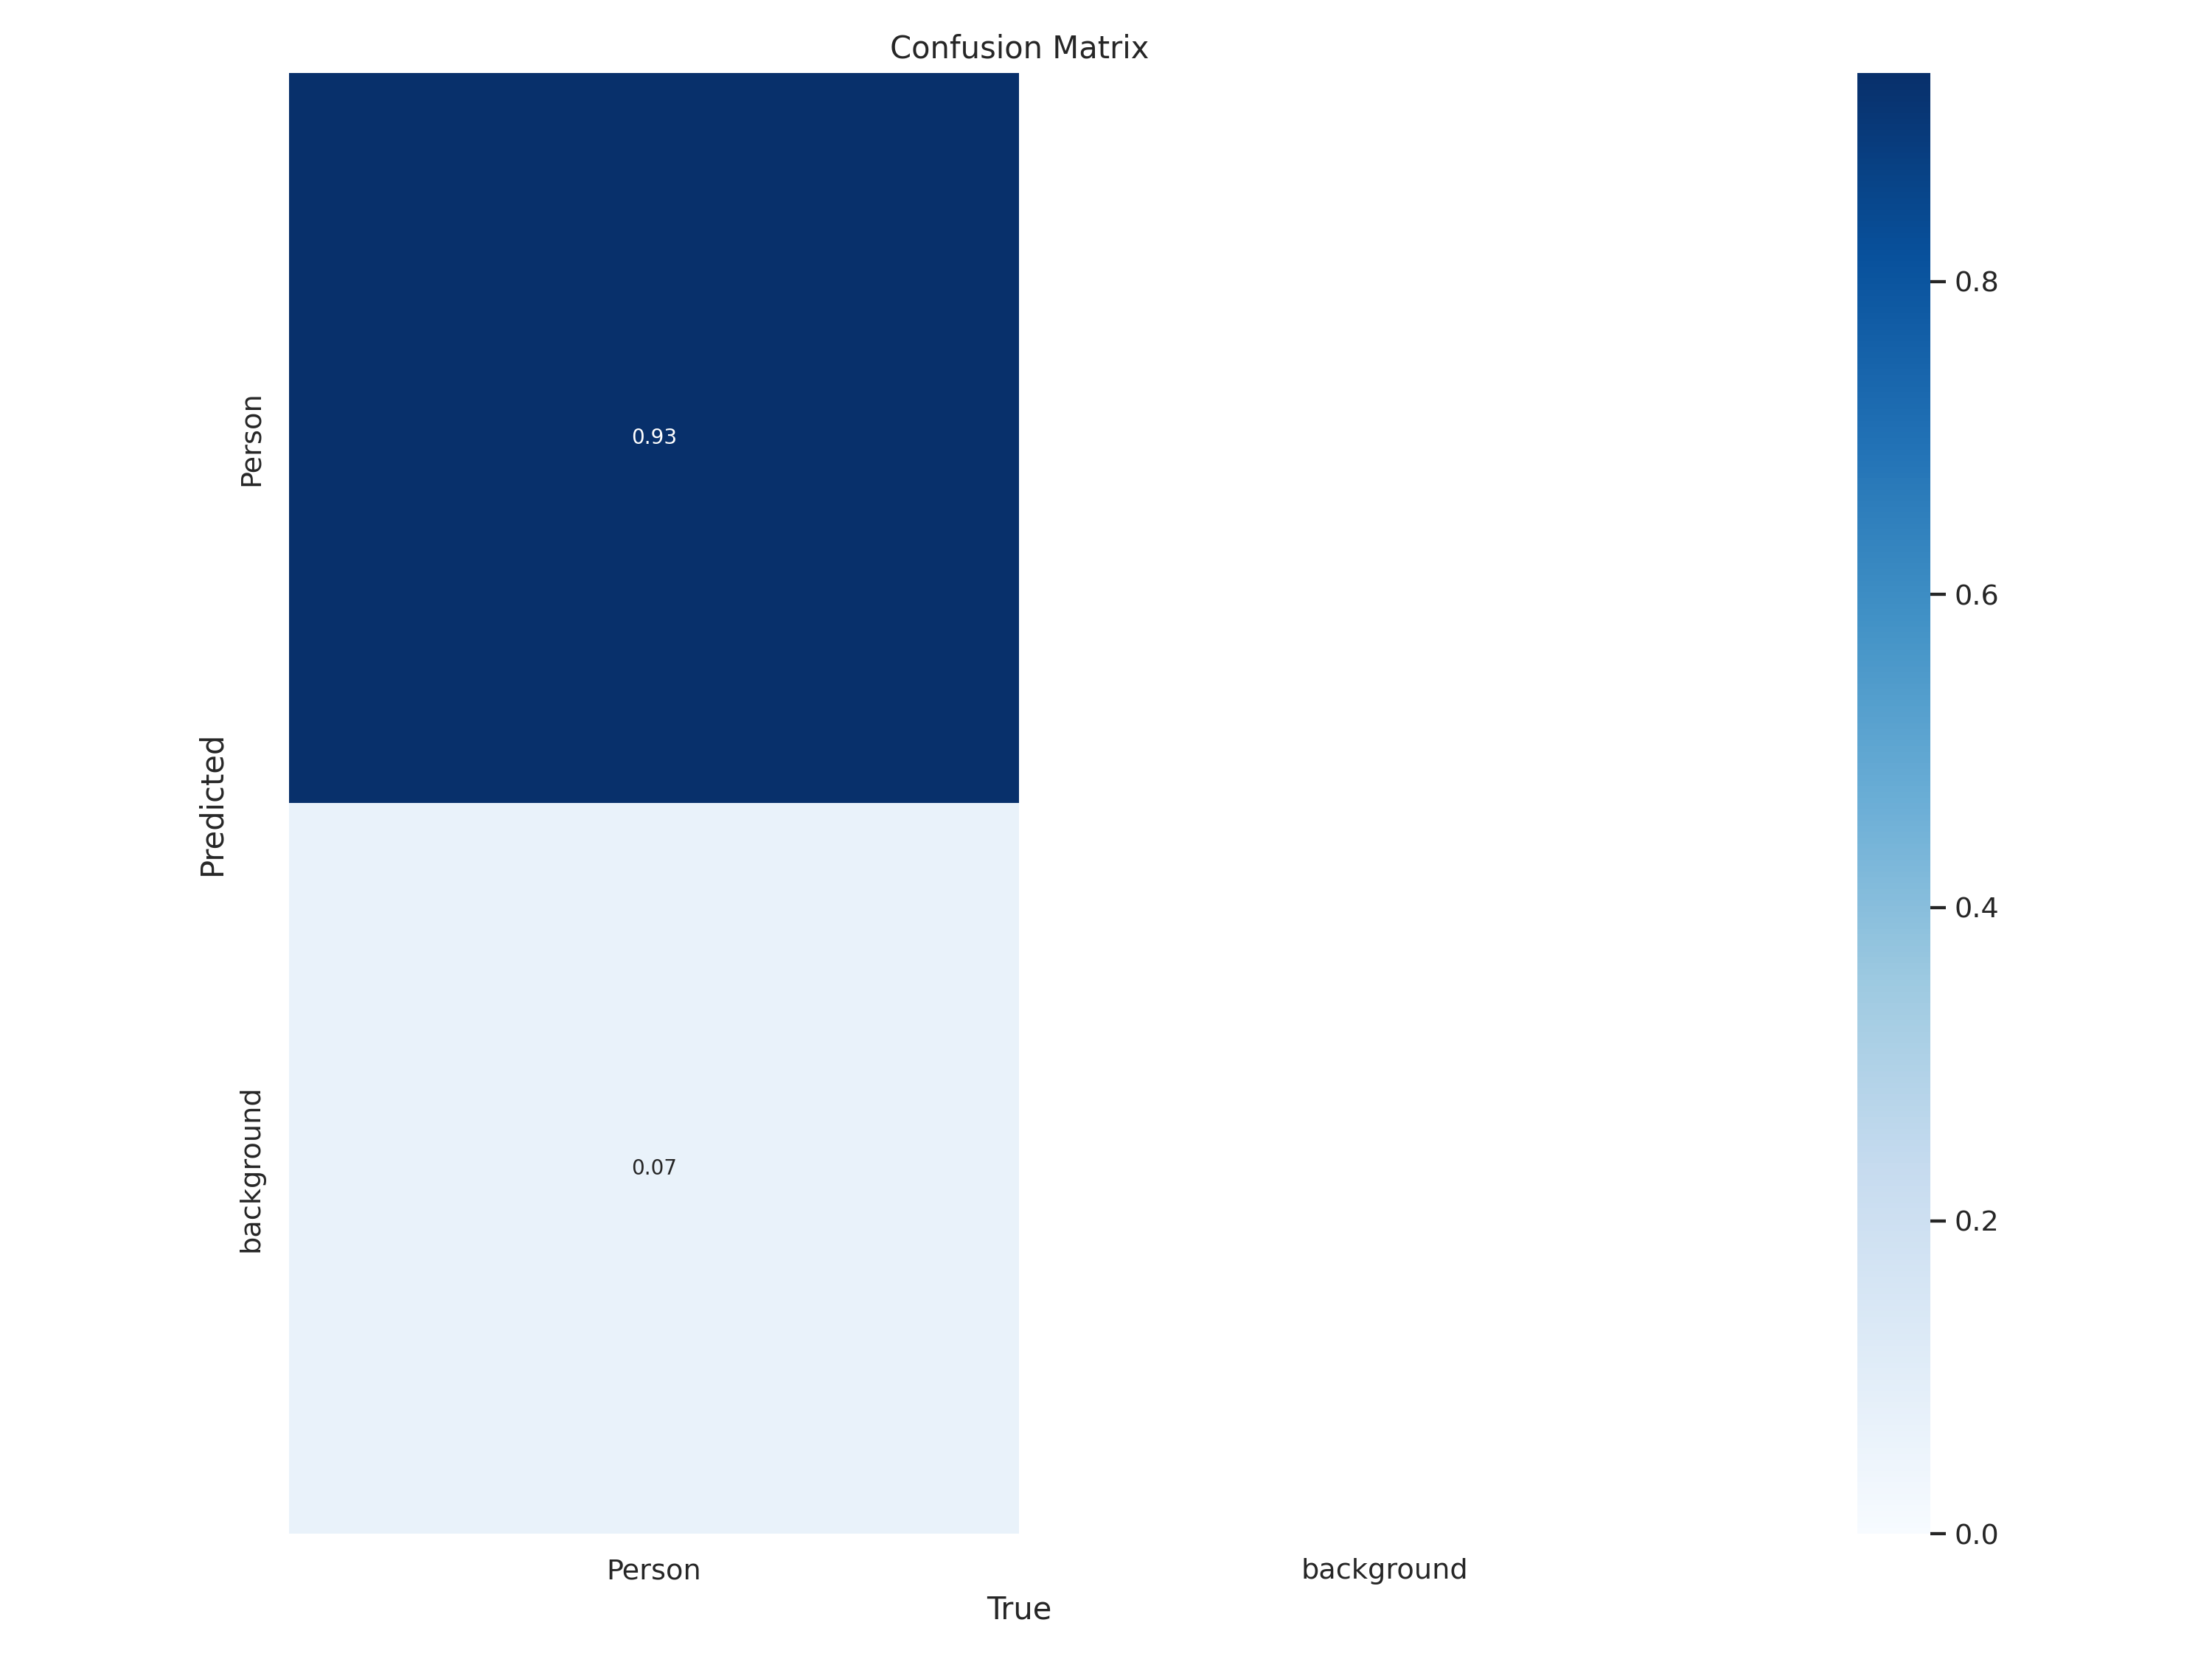

In [ ]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

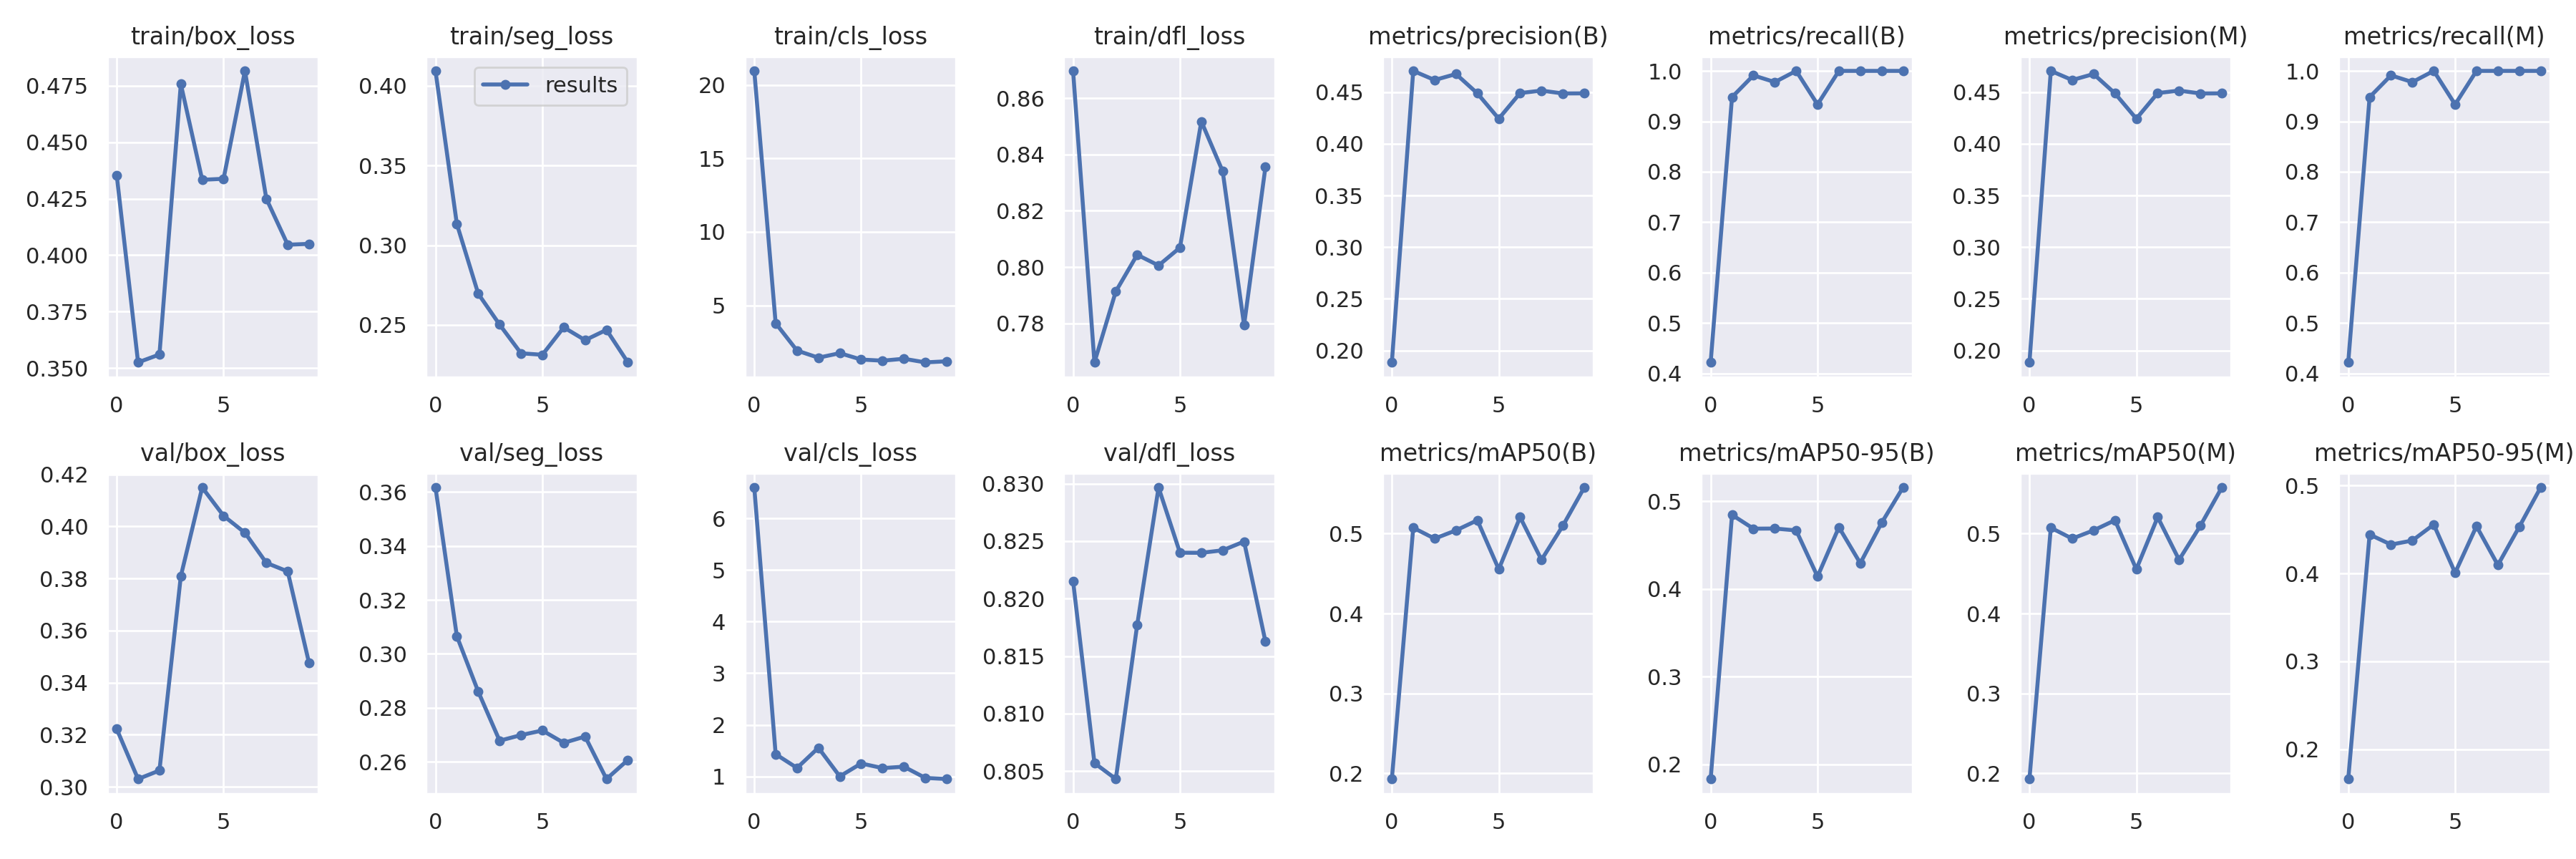

In [ ]:
Image(filename=f'runs/segment/train/results.png', width=600)

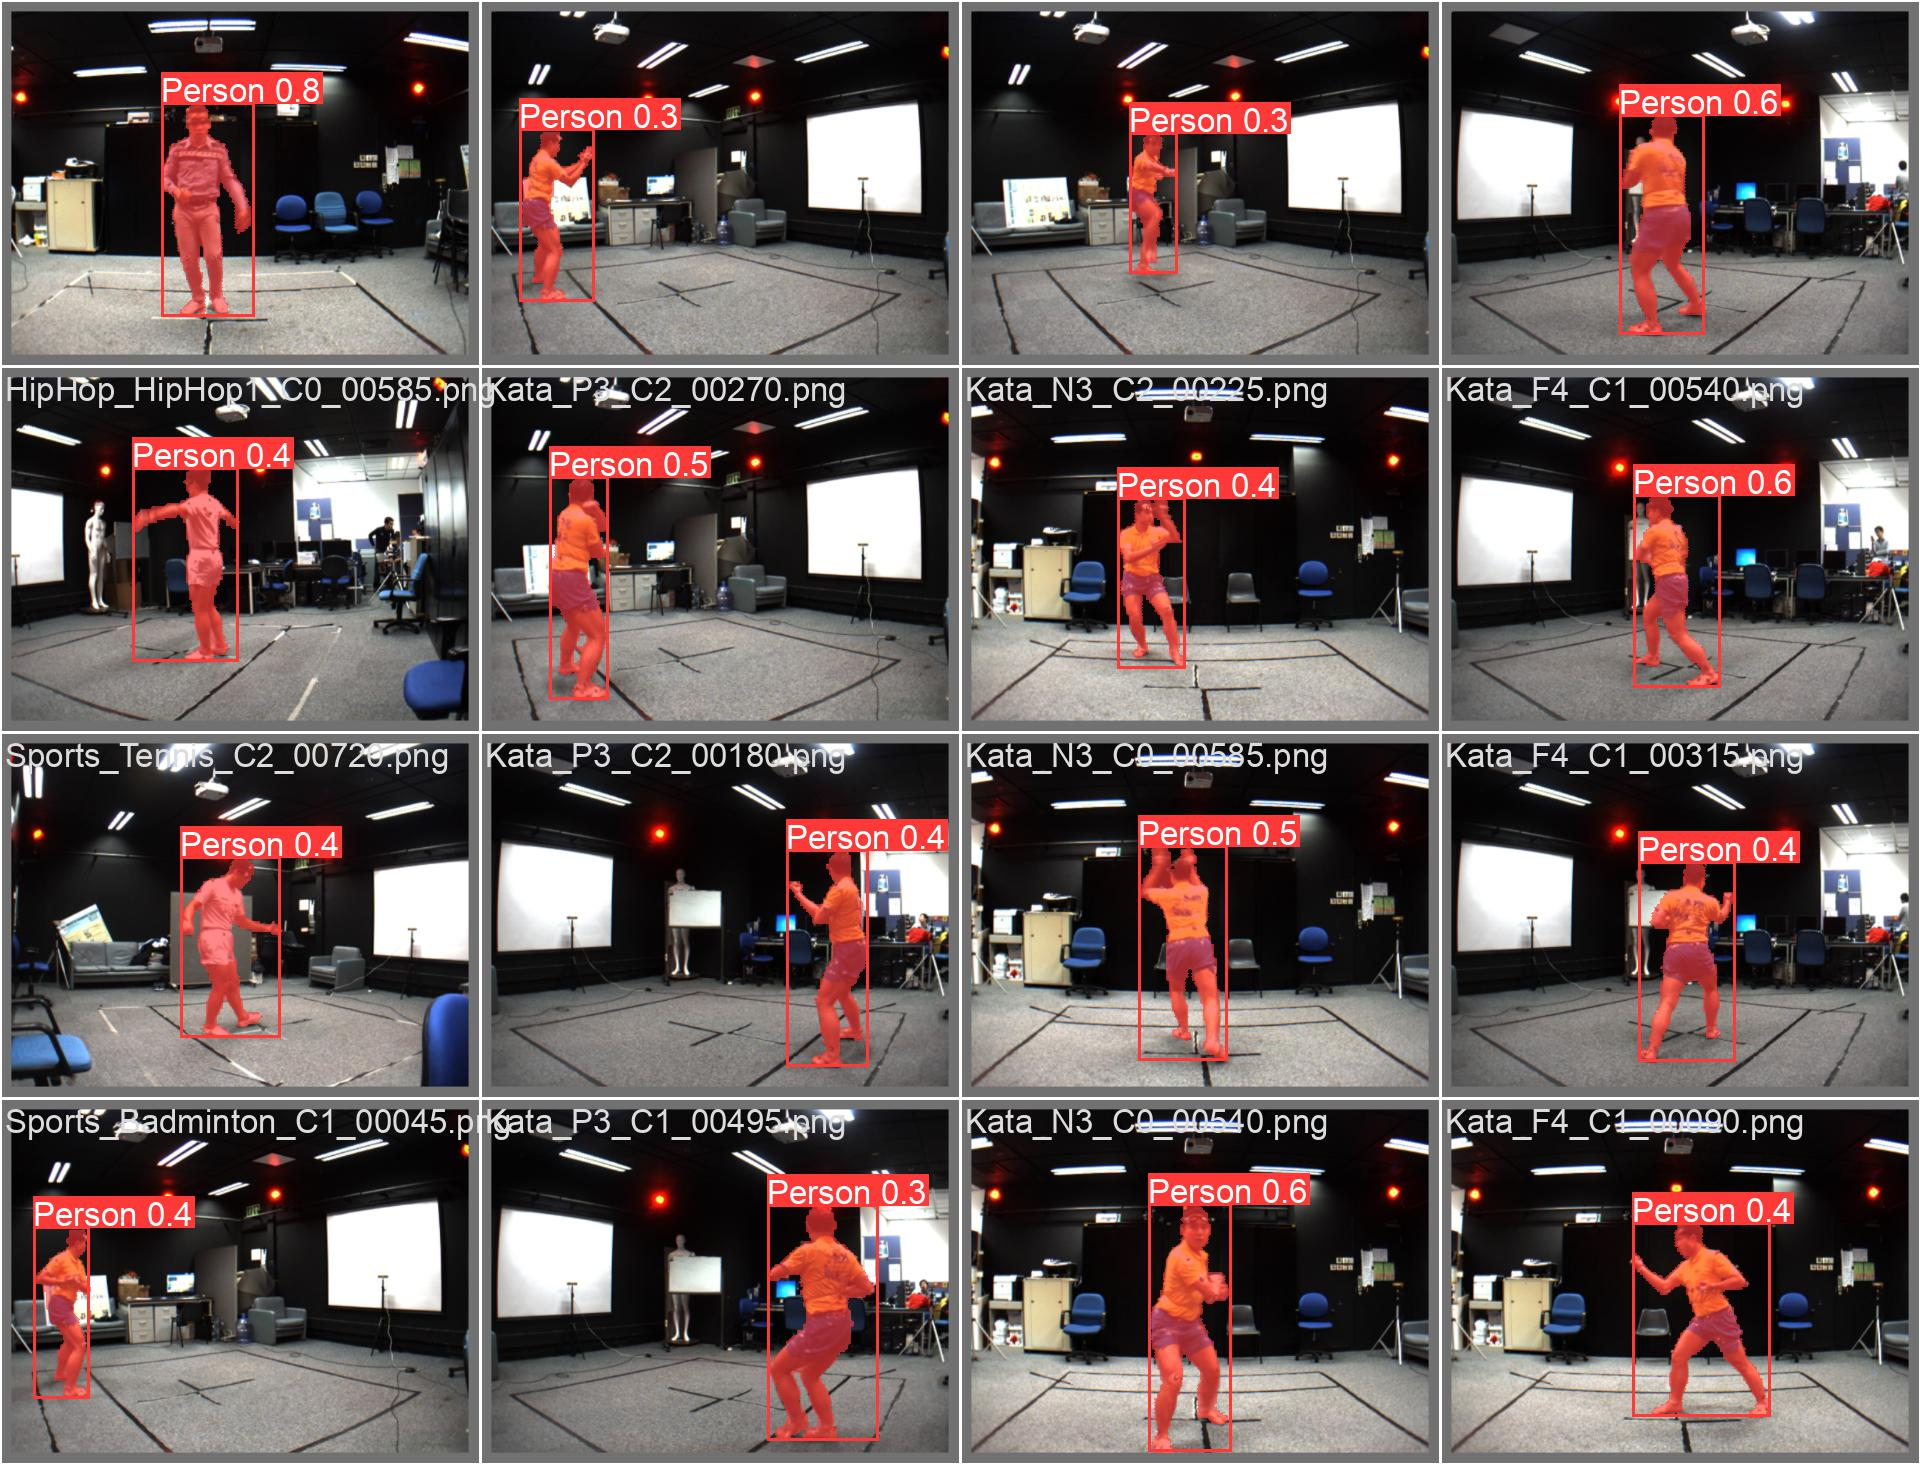

In [ ]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=segment mode=val model=/content/drive/MyDrive/fullbody_seg/runs/segment/train/weights/best.pt data=data.yaml

2023-07-14 06:56:39.181592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 06:56:40.088391: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/fullbody_seg/valid/labels.cache... 45 images, 55 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  57% 4/7 [00:03<00:03,  1.02s/it]Exception in thread Thread-4 (plot_images):
Traceback (most recent call last):
  Fi

## Inference with Custom Model

In [ ]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/fullbody_seg/runs/segment/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/fullbody_seg/test/images save=true

2023-07-14 06:57:25.216410: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 06:57:26.129900: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/200 /content/drive/MyDrive/fullbody_seg/test/images/HipHop_HipHop1_C0_00180.png: 480x640 1 Person, 137.6ms
image 2/200 /content/drive/MyDrive/fullbody_seg/test/images/HipHop_HipHop1_C0_00675.png: 480x640 1 Person, 17.0ms
image 3/200 /content/drive/MyDrive/fullbody_seg/test/images/HipHop_HipHop1_C1_00405.png: 480x640 1 Person, 41.9ms
image 4/200 /content/drive/MyDrive/fullbody_se

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/fullbody_seg/runs/segment/predict5/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/fullbody_seg/test/images/Jazz_Jazz4_C0_00765.png' save=true

2023-07-14 07:05:25.410873: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 07:05:26.309816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/drive/MyDrive/fullbody_seg/test/images/Jazz_Jazz4_C0_00765.png: 480x640 1 Person, 78.3ms
Speed: 0.6ms pre-process, 78.3ms inference, 93.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict8
